In [1]:
import xlrd
import urllib
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import requests
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#The primary data is downloaded from the below website and stored locally.
url = "https://demographics.coopercenter.org/sites/demographics/files/2020-01/VAPopulationEstimates_2019-07_UVACooperCenter.xls"
urllib.request.urlretrieve(url, "VirginiaCounties.xls")

('VirginiaCounties.xls', <http.client.HTTPMessage at 0x23b99f8a988>)

In [3]:
#Data is loaded into a Pandas dataframe
df = pd.read_excel('VirginiaCounties.xls','2019 Table',skiprows=6,skipfooter=49)

In [4]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1,Accomack County,33164,32561,-603,-0.018182
1,3,Albemarle County,99010,109722,10712,0.108191
2,5,Alleghany County,16250,14952,-1298,-0.079877
3,7,Amelia County,12690,13053,363,0.028605
4,9,Amherst County,32353,31766,-587,-0.018144
...,...,...,...,...,...,...
128,800,Suffolk City,84585,93825,9240,0.109239
129,810,Virginia Beach City,437994,452643,14649,0.033446
130,820,Waynesboro City,21006,22183,1177,0.056032
131,830,Williamsburg City,14067,15383,1316,0.093552


In [5]:
#Dropping unnecessary columns
df.drop(columns=['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 4', 'Unnamed: 5'], inplace=True)
df

,Unnamed: 1,Unnamed: 3
0,Accomack County,32561
1,Albemarle County,109722
2,Alleghany County,14952
3,Amelia County,13053
4,Amherst County,31766
...,...,...
128,Suffolk City,93825
129,Virginia Beach City,452643
130,Waynesboro City,22183
131,Williamsburg City,15383


In [6]:
#Renaming the remaining columns for ease of use
df.rename(columns={'Unnamed: 1': 'County', 'Unnamed: 3': 'Population'}, inplace=True)

In [7]:
df

,County,Population
0,Accomack County,32561
1,Albemarle County,109722
2,Alleghany County,14952
3,Amelia County,13053
4,Amherst County,31766
...,...,...
128,Suffolk City,93825
129,Virginia Beach City,452643
130,Waynesboro City,22183
131,Williamsburg City,15383


In [8]:
#Sort the data based on the population based on descending order
df.sort_values('Population', inplace=True, ascending=False)

In [9]:
df

,County,Population
28,Fairfax County,1143528
72,Prince William County,465498
129,Virginia Beach City,452643
52,Loudoun County,413546
20,Chesterfield County,350760
...,...,...
103,Emporia City,5589
22,Craig County,5108
8,Bath County,4318
119,Norton City,3879


In [10]:
#Due to the large number of counties, we are only going to evaluate the top 15 most populated counties
df_top15 = df.head(15).reset_index(drop=True)
df_top15

,County,Population
0,Fairfax County,1143528
1,Prince William County,465498
2,Virginia Beach City,452643
3,Loudoun County,413546
4,Chesterfield County,350760
5,Henrico County,328999
6,Chesapeake City,245745
7,Norfolk City,245054
8,Arlington County,242152
9,Richmond City,226841


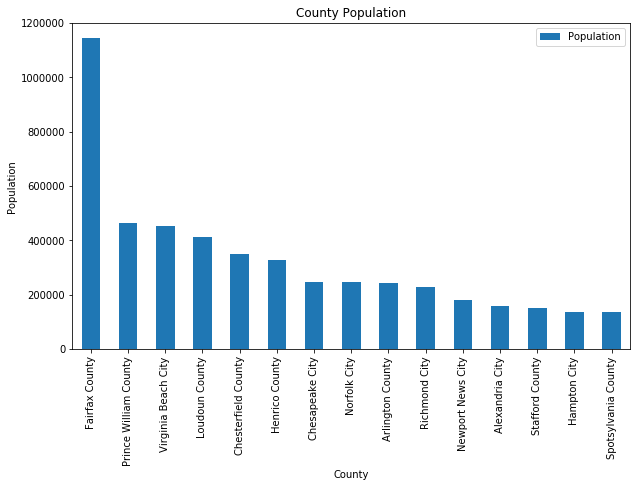

In [11]:
#Bar graph of population for each county

df_top15.plot.bar(x='County', y='Population', figsize=(10,6))

plt.xlabel('County') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('County Population') # add title to the plot

plt.show()

In [12]:
#Reading in the file for Average household income for each county

income1 = pd.read_csv('income by location.csv')
income1.drop(columns=['ID Race', 'ID Year', 'Household Income by Race Moe', 'ID Geography', 'Slug Geography'], inplace=True)
income1.head()

,Race,Year,Household Income by Race,Geography
0,White Non-Hispanic,2018,126375,"Alexandria city, VA"
1,Hispanic,2018,74854,"Virginia Beach city, VA"
2,Two Or More,2018,65078,"James City County, VA"
3,Total,2018,78584,"Albemarle County, VA"
4,Two Or More,2018,76052,"Frederick County, VA"


In [13]:
#Filtering for only "TOTAL" income instead of by race

indexNames = income1[income1['Race'] != 'Total' ].index
income1.drop(indexNames, inplace=True)
income1.reset_index(drop=True, inplace=True)
income1.head()

,Race,Year,Household Income by Race,Geography
0,Total,2018,78584,"Albemarle County, VA"
1,Total,2018,122394,"Arlington County, VA"
2,Total,2018,59820,"Augusta County, VA"
3,Total,2018,64084,"Bedford County, VA"
4,Total,2018,80655,"Chesterfield County, VA"


In [14]:
#Filtering for only 2018 data instead of all previous years

indexNames = income1[income1['Year']!=2018].index
income1.drop(indexNames, inplace=True)
income1.reset_index(drop=True, inplace=True)
income1.head()

,Race,Year,Household Income by Race,Geography
0,Total,2018,78584,"Albemarle County, VA"
1,Total,2018,122394,"Arlington County, VA"
2,Total,2018,59820,"Augusta County, VA"
3,Total,2018,64084,"Bedford County, VA"
4,Total,2018,80655,"Chesterfield County, VA"


In [15]:
#dropping "race" and "year" columns since they are all "total" and "2018"

income1.drop(columns=['Race','Year'],inplace=True)
income1.head()

,Household Income by Race,Geography
0,78584,"Albemarle County, VA"
1,122394,"Arlington County, VA"
2,59820,"Augusta County, VA"
3,64084,"Bedford County, VA"
4,80655,"Chesterfield County, VA"


In [16]:
#Dropping ", VA" from county name and capitalizing the first letter of each word to match the other table for merging 

for ind in range(0,income1.shape[0]):
    x = income1.iloc[ind,1].find(',')
    income1.iloc[ind,1] = income1.iloc[ind,1][:x]
    income1.iloc[ind,1] = income1.iloc[ind,1].title()
income1

,Household Income by Race,Geography
0,78584,Albemarle County
1,122394,Arlington County
2,59820,Augusta County
3,64084,Bedford County
4,80655,Chesterfield County
5,122227,Fairfax County
6,92145,Fauquier County
7,80953,Frederick County
8,91309,Hanover County
9,68069,Henrico County


In [17]:
#Using left merge to merge the two tables to add Income to the previous table.

income1.rename(columns={'Geography':'County', 'Household Income by Race': 'Income'}, inplace=True)
df_top15 = df_top15.merge(income1, on='County', how='left')
df_top15

,County,Population,Income
0,Fairfax County,1143528,122227
1,Prince William County,465498,107925
2,Virginia Beach City,452643,77059
3,Loudoun County,413546,139915
4,Chesterfield County,350760,80655
5,Henrico County,328999,68069
6,Chesapeake City,245745,80265
7,Norfolk City,245054,49587
8,Arlington County,242152,122394
9,Richmond City,226841,48987


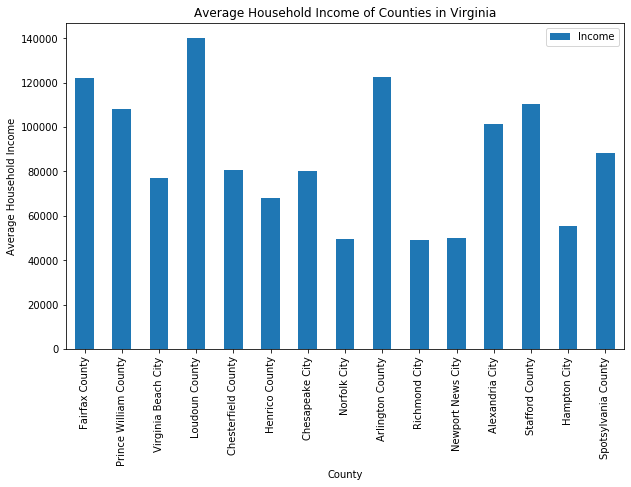

In [18]:
#Bar graph of average household income for each county

df_top15.plot.bar(x='County', y='Income', figsize=(10,6))

plt.xlabel('County') # add to x-label to the plot
plt.ylabel('Average Household Income') # add y-label to the plot
plt.title('Average Household Income of Counties in Virginia') # add title to the plot

plt.show()

In [19]:
#Setting initial latitude and longitude to 0 for all counties

df_top15['Latitude'] = 0
df_top15['Longitude'] = 0
df_top15

,County,Population,Income,Latitude,Longitude
0,Fairfax County,1143528,122227,0,0
1,Prince William County,465498,107925,0,0
2,Virginia Beach City,452643,77059,0,0
3,Loudoun County,413546,139915,0,0
4,Chesterfield County,350760,80655,0,0
5,Henrico County,328999,68069,0,0
6,Chesapeake City,245745,80265,0,0
7,Norfolk City,245054,49587,0,0
8,Arlington County,242152,122394,0,0
9,Richmond City,226841,48987,0,0


In [20]:
#Acquiring the latitude and longitude of each county using Python Geocoder

geolocator = Nominatim(user_agent="Virginia_Counties")
for x in range(0, 15):
        address = df_top15.iloc[x,0] + ', VA'
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        df_top15.iloc[x,3] = latitude
        df_top15.iloc[x, 4] = longitude
df_top15

,County,Population,Income,Latitude,Longitude
0,Fairfax County,1143528,122227,38.815636,-77.283685
1,Prince William County,465498,107925,38.738985,-77.553674
2,Virginia Beach City,452643,77059,36.594320,-75.887601
3,Loudoun County,413546,139915,39.098459,-77.670501
4,Chesterfield County,350760,80655,37.385998,-77.578509
5,Henrico County,328999,68069,37.545519,-77.423412
6,Chesapeake City,245745,80265,39.527100,-75.812478
7,Norfolk City,245054,49587,36.888993,-76.248162
8,Arlington County,242152,122394,38.876933,-77.089309
9,Richmond City,226841,48987,37.528959,-77.438107


In [21]:
#Since Python recognizes Chesapeake, VA as Chesapeake, MD, we have to change it manually.

df_top15.iloc[6,3]=36.7682
df_top15.iloc[6,4]=-76.2875
df_top15

,County,Population,Income,Latitude,Longitude
0,Fairfax County,1143528,122227,38.815636,-77.283685
1,Prince William County,465498,107925,38.738985,-77.553674
2,Virginia Beach City,452643,77059,36.594320,-75.887601
3,Loudoun County,413546,139915,39.098459,-77.670501
4,Chesterfield County,350760,80655,37.385998,-77.578509
5,Henrico County,328999,68069,37.545519,-77.423412
6,Chesapeake City,245745,80265,36.768200,-76.287500
7,Norfolk City,245054,49587,36.888993,-76.248162
8,Arlington County,242152,122394,38.876933,-77.089309
9,Richmond City,226841,48987,37.528959,-77.438107


In [22]:
#Plotting the location of each county on an interactive map

import folium

address = "Virginia"
address = df_top15.iloc[x,0] + ', VA'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_virginia = folium.Map(location=[latitude, longitude], zoom_start=7)

for ind in range(0, df_top15.shape[0]):
    label = 'Rank: {}\n{}\nPopulation: {}\nIncome: {}'.format(ind+1, df_top15.iloc[ind,0], df_top15.iloc[ind,1], df_top15.iloc[ind,2])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [df_top15.iloc[ind,3], df_top15.iloc[ind,4]],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='violet',
        fill_opacity=0.7,
        parse_html=False).add_to(map_virginia)  
    
map_virginia

In [23]:
#Clientd ID and secret for FOURSQUARE

CLIENT_ID = ' ' # your Foursquare ID
CLIENT_SECRET = ' ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 100

In [24]:
#Function to get the number of supermarkets in a particular area

def getNearbyVenues(cities, latitudes, longitudes):
    
    venues_list=[]
    supermarket_category = '4bf58dd8d48988d118951735'
    for city, lat, lng in zip(cities, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            supermarket_category,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        for x in results:
            venues_list.append([(city, x['venue']['name']) for v in results])

    print ('number: ', len(venues_list))
    nearby_venues = pd.DataFrame(item for venue_list in venues_list for item in venue_list)
    print (nearby_venues.shape)
    nearby_venues.columns = ['County', 'Venue']
    
    return(nearby_venues)

In [25]:
#Calling the function to get the number of supermarkets in the top 15 counties

virginia_supermarkets = getNearbyVenues(df_top15['County'],
                                   df_top15['Latitude'],
                                   df_top15['Longitude']
                                  )

number:  774
(49726, 2)


In [26]:
#Drops all the duplicate rows since it returns an item multiple times

virginia_supermarkets.drop_duplicates(inplace=True)
print (virginia_supermarkets.shape)
virginia_supermarkets.head(20)

(463, 2)


,County,Venue
0,Fairfax County,Safeway
82,Fairfax County,H Mart
164,Fairfax County,Giant Food
246,Fairfax County,Trader Joe's
574,Fairfax County,Wegmans
656,Fairfax County,Lotte Plaza Market
738,Fairfax County,Shoppers Food Market
820,Fairfax County,Whole Foods Market
902,Fairfax County,Healthway Natural Foods‎ Inc
984,Fairfax County,Roberta's Natural Foods


In [27]:
#Calculating the number of supermarkets in each county

supermarket_counts = virginia_supermarkets.groupby('County').count()

In [28]:
#Adding the number of supermarkets to our dataframe

df_top15 = df_top15.merge(supermarket_counts, on='County', how='left')
df_top15

,County,Population,Income,Latitude,Longitude,Venue
0,Fairfax County,1143528,122227,38.815636,-77.283685,52
1,Prince William County,465498,107925,38.738985,-77.553674,35
2,Virginia Beach City,452643,77059,36.594320,-75.887601,11
3,Loudoun County,413546,139915,39.098459,-77.670501,36
4,Chesterfield County,350760,80655,37.385998,-77.578509,51
5,Henrico County,328999,68069,37.545519,-77.423412,27
6,Chesapeake City,245745,80265,36.768200,-76.287500,29
7,Norfolk City,245054,49587,36.888993,-76.248162,32
8,Arlington County,242152,122394,38.876933,-77.089309,34
9,Richmond City,226841,48987,37.528959,-77.438107,24


In [29]:
#Renaming the "VENUE" column to "COUNT" for the number of supermarkets

df_top15.rename(columns={'Venue':'Count'},inplace=True)
df_top15

,County,Population,Income,Latitude,Longitude,Count
0,Fairfax County,1143528,122227,38.815636,-77.283685,52
1,Prince William County,465498,107925,38.738985,-77.553674,35
2,Virginia Beach City,452643,77059,36.594320,-75.887601,11
3,Loudoun County,413546,139915,39.098459,-77.670501,36
4,Chesterfield County,350760,80655,37.385998,-77.578509,51
5,Henrico County,328999,68069,37.545519,-77.423412,27
6,Chesapeake City,245745,80265,36.768200,-76.287500,29
7,Norfolk City,245054,49587,36.888993,-76.248162,32
8,Arlington County,242152,122394,38.876933,-77.089309,34
9,Richmond City,226841,48987,37.528959,-77.438107,24


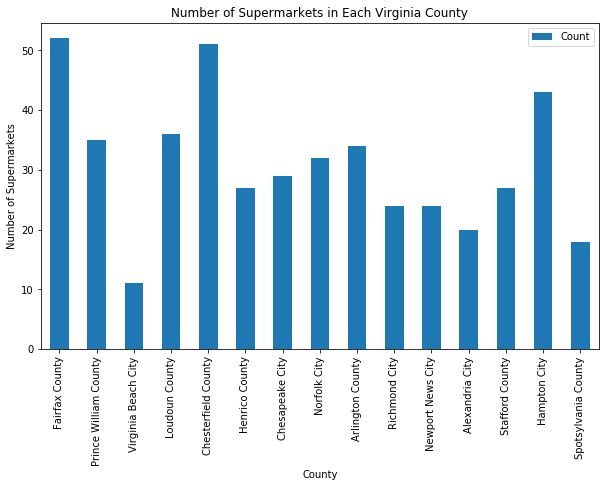

In [30]:
#Plotting the number of supermarkets in each county

df_top15.plot.bar(x='County', y='Count', figsize=(10,6))

plt.xlabel('County') # add to x-label to the plot
plt.ylabel('Number of Supermarkets') # add y-label to the plot
plt.title('Number of Supermarkets in Each Virginia County') # add title to the plot

plt.show()

In [31]:
#Creating a new variable for the number of supermarkets for every 10,000 residents

df_top15['Per 10000'] = 0
for ind in range(0,df_top15.shape[0]):
    df_top15.iloc[ind,6] = df_top15.iloc[ind,5] /(df_top15.iloc[ind,1]/10000)
df_top15

,County,Population,Income,Latitude,Longitude,Count,Per 10000
0,Fairfax County,1143528,122227,38.815636,-77.283685,52,0.454733
1,Prince William County,465498,107925,38.738985,-77.553674,35,0.751883
2,Virginia Beach City,452643,77059,36.594320,-75.887601,11,0.243017
3,Loudoun County,413546,139915,39.098459,-77.670501,36,0.870520
4,Chesterfield County,350760,80655,37.385998,-77.578509,51,1.453986
5,Henrico County,328999,68069,37.545519,-77.423412,27,0.820671
6,Chesapeake City,245745,80265,36.768200,-76.287500,29,1.180085
7,Norfolk City,245054,49587,36.888993,-76.248162,32,1.305835
8,Arlington County,242152,122394,38.876933,-77.089309,34,1.404077
9,Richmond City,226841,48987,37.528959,-77.438107,24,1.058010


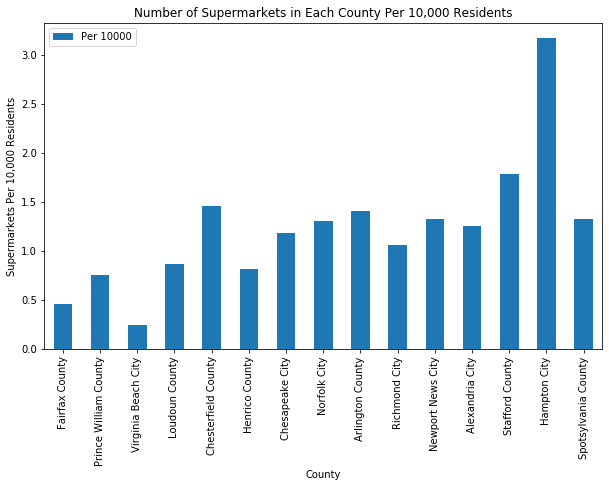

In [32]:
#Plotting the number of supermarkets for every 10,000 residents in each county

df_top15.plot.bar(x='County', y='Per 10000', figsize=(10,6))

plt.xlabel('County') # add to x-label to the plot
plt.ylabel('Supermarkets Per 10,000 Residents') # add y-label to the plot
plt.title('Number of Supermarkets in Each County Per 10,000 Residents') # add title to the plot

plt.show()

In [33]:
#making a copy of the dataframe to clustered

clustered = df_top15.copy()

In [34]:
#Dropping the unnecessary columns for K-means clustering

clustered.drop(columns=['County','Latitude','Longitude'], inplace=True)
clustered.head()

,Population,Income,Count,Per 10000
0,1143528,122227,52,0.454733
1,465498,107925,35,0.751883
2,452643,77059,11,0.243017
3,413546,139915,36,0.870520
4,350760,80655,51,1.453986


In [35]:
#Performing K-means cluster on our dataframe

from sklearn.cluster import KMeans

kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustered)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([2, 0, 0, 0, 4, 4, 3, 3, 3, 3, 1, 1, 1, 1, 1])

In [36]:
#Adding the County names back to the dataframe

clustered.insert(0, 'Cluster Labels', kmeans.labels_)
clustered['County']=""
for ind in range(0,clustered.shape[0]):
    clustered.iloc[ind, 5] = df_top15.iloc[ind, 0]
clustered

,Cluster Labels,Population,Income,Count,Per 10000,County
0,2,1143528,122227,52,0.454733,Fairfax County
1,0,465498,107925,35,0.751883,Prince William County
2,0,452643,77059,11,0.243017,Virginia Beach City
3,0,413546,139915,36,0.870520,Loudoun County
4,4,350760,80655,51,1.453986,Chesterfield County
5,4,328999,68069,27,0.820671,Henrico County
6,3,245745,80265,29,1.180085,Chesapeake City
7,3,245054,49587,32,1.305835,Norfolk City
8,3,242152,122394,34,1.404077,Arlington County
9,3,226841,48987,24,1.058010,Richmond City


In [37]:
#showing the characteristics of each cluster

clustered.groupby('Cluster Labels').mean()

,Population,Income,Count,Per 10000
Cluster Labels,,,,
0,4.438957e+05,108299.666667,27.333333,0.621807
1,1.526618e+05,81119.800000,26.400000,1.771282
2,1.143528e+06,122227.000000,52.000000,0.454733
3,2.399480e+05,75308.250000,29.750000,1.237002
4,3.398795e+05,74362.000000,39.000000,1.137328


In [38]:
clustered['County']=""
for ind in range(0,clustered.shape[0]):
    clustered.iloc[ind, 5] = df_top15.iloc[ind, 0]
clustered.sort_values('Population', ascending=False, inplace=True)

In [39]:
clustered

,Cluster Labels,Population,Income,Count,Per 10000,County
0,2,1143528,122227,52,0.454733,Fairfax County
1,0,465498,107925,35,0.751883,Prince William County
2,0,452643,77059,11,0.243017,Virginia Beach City
3,0,413546,139915,36,0.870520,Loudoun County
4,4,350760,80655,51,1.453986,Chesterfield County
5,4,328999,68069,27,0.820671,Henrico County
6,3,245745,80265,29,1.180085,Chesapeake City
7,3,245054,49587,32,1.305835,Norfolk City
8,3,242152,122394,34,1.404077,Arlington County
9,3,226841,48987,24,1.058010,Richmond City


In [43]:
#Mapping the location of each county with the color of their cluster 

import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_top15['Latitude'], df_top15['Longitude'], df_top15['County'], clustered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters